In [1]:
Datos1<-read.csv("../input/SANA_DISTANCIA.csv")
str(Datos1)

'data.frame':	38151 obs. of  15 variables:
 $ DICTAMEN      : Factor w/ 2 levels "FINADO","RECUP": 1 1 1 1 1 1 1 1 1 1 ...
 $ SEXO          : Factor w/ 2 levels "HOMBRE","MUJER": 1 1 1 2 1 1 1 1 1 1 ...
 $ TIPO_PACIENTE : Factor w/ 2 levels "AMBULATORIO",..: 2 2 2 2 2 2 2 2 1 2 ...
 $ NEUMONIA      : Factor w/ 2 levels "NO","SI": 1 2 2 2 2 2 1 2 2 2 ...
 $ EDAD          : int  65 52 65 65 47 42 63 44 71 42 ...
 $ EMBARAZO      : Factor w/ 3 levels "NO","NO APLICA",..: 2 2 2 1 2 2 2 2 2 2 ...
 $ DIABETES      : Factor w/ 2 levels "NO","SI": 2 1 1 1 1 1 1 1 1 2 ...
 $ EPOC          : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ ASMA          : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ INMUSUPR      : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ HIPERTENSION  : Factor w/ 2 levels "NO","SI": 1 2 1 1 1 1 1 1 2 1 ...
 $ CARDIOVASCULAR: Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ OBESIDAD      : Factor w/ 2 levels "NO","SI": 1 1 1 1 2 2 1 1 

In [2]:
Datos1$NEUMONIA<-NULL
Datos1$EPOC<-NULL

In [3]:
str(Datos1)

'data.frame':	38151 obs. of  13 variables:
 $ DICTAMEN      : Factor w/ 2 levels "FINADO","RECUP": 1 1 1 1 1 1 1 1 1 1 ...
 $ SEXO          : Factor w/ 2 levels "HOMBRE","MUJER": 1 1 1 2 1 1 1 1 1 1 ...
 $ TIPO_PACIENTE : Factor w/ 2 levels "AMBULATORIO",..: 2 2 2 2 2 2 2 2 1 2 ...
 $ EDAD          : int  65 52 65 65 47 42 63 44 71 42 ...
 $ EMBARAZO      : Factor w/ 3 levels "NO","NO APLICA",..: 2 2 2 1 2 2 2 2 2 2 ...
 $ DIABETES      : Factor w/ 2 levels "NO","SI": 2 1 1 1 1 1 1 1 1 2 ...
 $ ASMA          : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ INMUSUPR      : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ HIPERTENSION  : Factor w/ 2 levels "NO","SI": 1 2 1 1 1 1 1 1 2 1 ...
 $ CARDIOVASCULAR: Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ OBESIDAD      : Factor w/ 2 levels "NO","SI": 1 1 1 1 2 2 1 1 1 2 ...
 $ RENAL_CRONICA : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 1 1 ...
 $ TABAQUISMO    : Factor w/ 2 levels "NO","SI": 1 1 1 1 1 1 1 1 

In [4]:
library(rpart)
library(rpart.plot)

#modelo rpart
modelo_rpart<-rpart(DICTAMEN~.,
                    method = "class",
                    data=Datos1)

#importancia del modelo
library(caret) # libreria de la importancia
dt_importance <- varImp(modelo_rpart)
print(dt_importance) #variables y su importancia en el modelo

summary(modelo_rpart) #características del modelo

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




                   Overall
CARDIOVASCULAR   20.436554
DIABETES        510.416041
EDAD           1384.423694
EMBARAZO          4.667142
HIPERTENSION    523.064888
RENAL_CRONICA   218.377730
SEXO              4.667142
TIPO_PACIENTE  1926.231225
ASMA              0.000000
INMUSUPR          0.000000
OBESIDAD          0.000000
TABAQUISMO        0.000000
Call:
rpart(formula = DICTAMEN ~ ., data = Datos1, method = "class")
  n= 38151 

          CP nsplit rel error    xerror       xstd
1 0.01051176      0 1.0000000 1.0000000 0.01182216
2 0.01000000      3 0.9684647 0.9961826 0.01180380

Variable importance
 TIPO_PACIENTE           EDAD       DIABETES   HIPERTENSION  RENAL_CRONICA 
            55             23             10              9              2 
CARDIOVASCULAR 
             1 

Node number 1: 38151 observations,    complexity param=0.01051176
  predicted class=RECUP   expected loss=0.1579251  P(node) =1
    class counts:  6025 32126
   probabilities: 0.158 0.842 
  left son=2 (15479

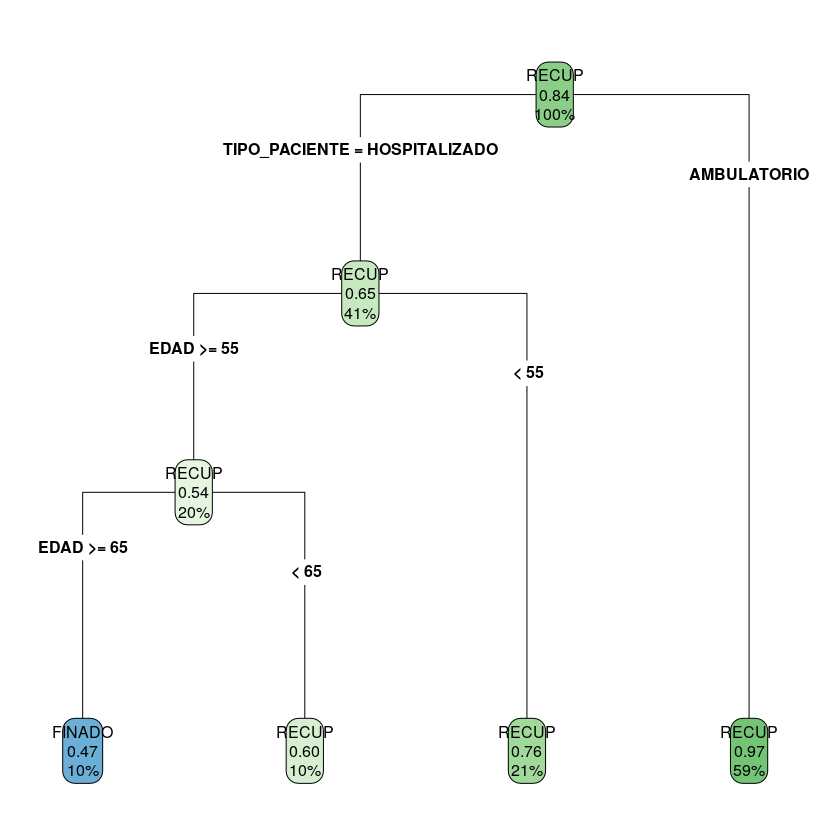

In [5]:
rpart.plot(modelo_rpart,tweak=0.8,extra=106,type=4)#,type=2,extra=100,tweak=0.8,compress=FALSE,cex=1.2

In [6]:
#modelo C50
library(C50)
modelo_c50<-C5.0(Datos1[,c(2:13)],Datos1$DICTAMEN)
summary(modelo_c50)


Call:
C5.0.default(x = Datos1[, c(2:13)], y = Datos1$DICTAMEN)


C5.0 [Release 2.07 GPL Edition]  	Sun Jun  7 06:41:29 2020
-------------------------------

Class specified by attribute `outcome'

Read 38151 cases (13 attributes) from undefined.data

Decision tree:

TIPO_PACIENTE = AMBULATORIO: RECUP (22672/604)
TIPO_PACIENTE = HOSPITALIZADO:
:...EDAD <= 52: RECUP (7171/1665)
    EDAD > 52:
    :...RENAL_CRONICA = SI: FINADO (454/178)
        RENAL_CRONICA = NO:
        :...EDAD <= 64: RECUP (4311/1651)
            EDAD > 64:
            :...EDAD > 79: FINADO (640/267)
                EDAD <= 79:
                :...OBESIDAD = NO: RECUP (2323/1139)
                    OBESIDAD = SI: FINADO (580/263)


Evaluation on training data (38151 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     7 5767(15.1%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   966  5059    (a): class FINADO
	   708 31418    (b): class RECUP


	Attribute usage:

	100.00%	TIPO

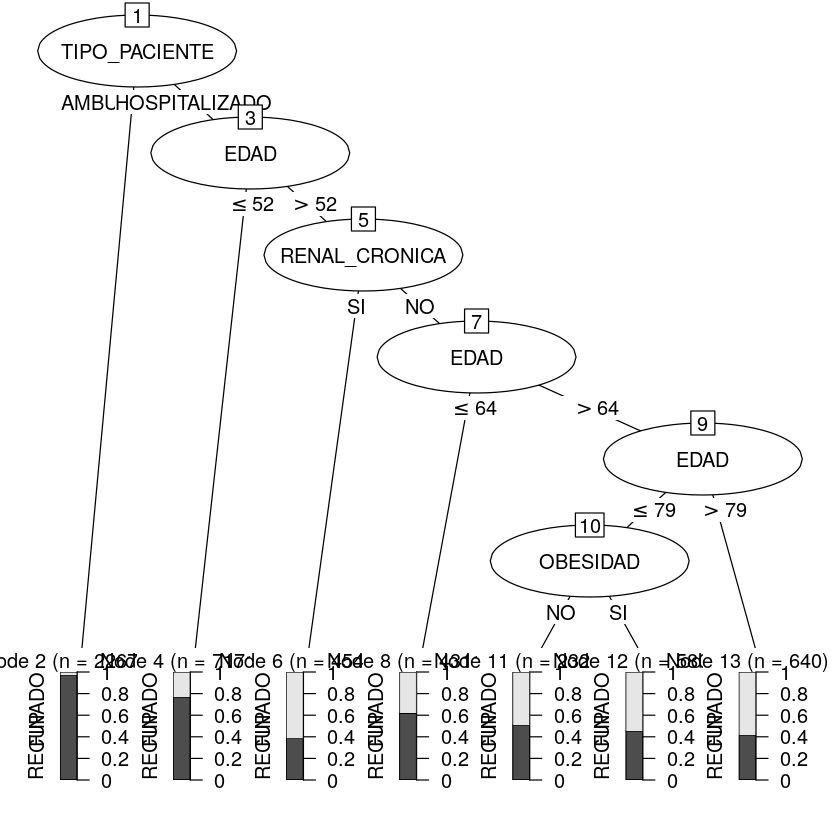

In [7]:
plot(modelo_c50,cex=2)#,subtree = 3